In [1]:
#import needed packages
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt
from statsmodels.graphics.gofplots import ProbPlot

import plotly.express as px

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
#set directory
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
data_dir= str(main_dir)+"\Data"

os.chdir(data_dir)

In [4]:
lego_subset= pd.read_csv('LEGO_subset1.csv')
print(lego_subset.shape)
lego_subset.head()
lego_subset= lego_subset.drop(columns=['Unnamed: 0'])
lego_subset.head()

(10165, 8)


,list_price,piece_count,num_reviews,review_difficulty,star_rating,country_num,min_age
0,29.99,277.0,2.0,3,4.5,1,6.0
1,19.99,168.0,2.0,2,5.0,1,6.0
2,12.99,74.0,11.0,2,4.3,1,6.0
3,99.99,1032.0,23.0,3,4.6,1,12.0
4,79.99,744.0,14.0,4,4.6,1,12.0


In [5]:
lego_subset['star_rating'] = np.where(lego_subset['star_rating'] > 4.5, True, False)

columns_to_drop_from_X = ['star_rating']
X = lego_subset.drop(columns_to_drop_from_X, axis = 1)
y = np.array(lego_subset['star_rating'])

lego_subset['star_rating'].value_counts()

True     5888
False    4277
Name: star_rating, dtype: int64

In [6]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

oversample= SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#scale X
X_train = scale(X_train)
X_test = scale(X_test)
print(X_train[0:2])
print(X_test[0:2])

[[-0.54189473 -0.4500459  -0.40512307 -0.54958967  0.40058758 -0.1369661 ]
 [-0.52851804 -0.41175601 -0.26131654  0.66500057 -0.90772969 -0.48343349]]
[[-0.65782698 -0.57325371 -0.35266199  0.62979355  1.05831875 -1.18593346]
 [-0.60174978 -0.56880871 -0.37896331 -0.57678329 -0.24857823 -1.18593346]]


# Decision Tree

DecisionTreeClassifier()


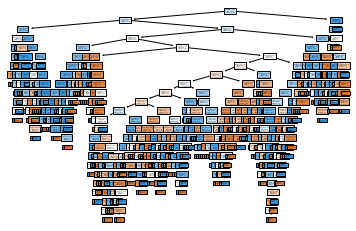

(8314, 6) (8314,)
(3050, 6) (3050,)


In [7]:
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(X, y)
print(clf_fit)

tree.plot_tree(clf_fit, 
              feature_names= X.columns,  
              filled=True)
plt.show()

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter= Counter(y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [8]:
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(X_train, y_train)

# Predict on ex_X_test.
y_predict = clf_fit.predict(X_test)
y_predict[:20]

array([False,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [11]:
tree_accuracy_score = accuracy_score(y_test, y_predict)
print("Accuracy on test data: ", tree_accuracy_score)

# Compute accuracy using training data.
acc_train_tree = clf_fit.score(X_train,
                                 y_train)

print ("Train Accuracy:", acc_train_tree)
clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X, y, cv = 10)
print(cv_scores)

print('cv_scores mean:{}'.format(np.mean(cv_scores)))

Accuracy on test data:  0.980983606557377
Train Accuracy: 1.0
[0.96558505 0.98033432 0.94788594 0.99803343 0.98918387 0.98523622
 0.99606299 0.99901575 0.99704724 0.99901575]
cv_scores mean:0.9857400568291796


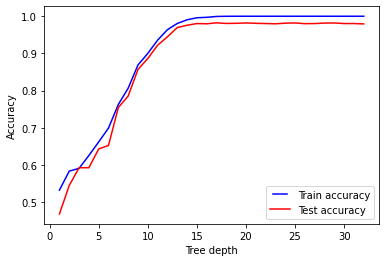

In [12]:
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)
  
max_depths = np.linspace(1, 32, 32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth = max_depth.astype(int))
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)

# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths,test_results)  

# Plot max depth over 1 - 32. 
line1, = plt.plot(max_depths, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [13]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)

# Store optimal max_depth.
optimal_min_samples_split = optimal_parameter(min_samples_splits,test_results) 

In [14]:
#optimize min samples leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)

optimal_min_samples_leafs = optimal_parameter(min_samples_leafs, test_results)

In [15]:
#optimize max features
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)

optimal_max_features = optimal_parameter(max_features, test_results) 



print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_split)
print("The optimal max features is:", optimal_max_features)

The optimal max depth is: 17.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 5


In [16]:
#build optimized model
np.random.seed(1)

clf_optimized = tree.DecisionTreeClassifier(max_depth = optimal_max_depth.astype(int),
                                            min_samples_split = optimal_min_samples_split,
                                            min_samples_leaf = optimal_min_samples_leafs,
                                            max_features = optimal_max_features)
                                            
print(clf_optimized)

clf_optimized_fit = clf_optimized.fit(X_train, y_train)
y_predict_optimized = clf_optimized_fit.predict(X_test)
acc_score_tree_optimized = accuracy_score(y_test, y_predict_optimized)
print(acc_score_tree_optimized)


acc_train_tree_optimized = clf_optimized_fit.score(X_train, y_train)
print ("Train Accuracy:", acc_train_tree_optimized)

DecisionTreeClassifier(max_depth=17, max_features=5, min_samples_leaf=0.1,
                       min_samples_split=0.1)
0.6068852459016394
Train Accuracy: 0.621842675006014


# Random Forest

In [17]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, 
                                  random_state = 1)
forest.fit(X_train, y_train)


y_predict_forest = forest.predict(X_test)
print(y_predict_forest[0:5, ])

[False  True  True False  True]


In [19]:
conf_matrix_forest = metrics.confusion_matrix(y_test, y_predict_forest)
print(conf_matrix_forest)
accuracy_forest = metrics.accuracy_score(y_test, y_predict_forest)
print("Accuracy for random forest on test data: ", accuracy_forest)

acc_train_forest = forest.score(X_train, y_train)
print ("Train Accuracy:", acc_train_forest)

[[1290   29]
 [  16 1715]]
Accuracy for random forest on test data:  0.9852459016393442
Train Accuracy: 1.0


In [20]:
#test accuracy and train accuracy

accu= {accuracy_forest:'Test', acc_train_forest:'Train'}

accu= pd.Series(accu, name='accuracy')

accu=pd.DataFrame(accu)
accu=accu.reset_index()
accu

accu= accu.pivot(columns='accuracy', values='index')
accu


accuracy,Test,Train
0,0.985246,NaN
1,NaN,1.0


[Text(0.5, 0, 'Accuracy'),
 Text(0.5, 1.0, 'GBM Train Accuracy and Test Accuracy')]

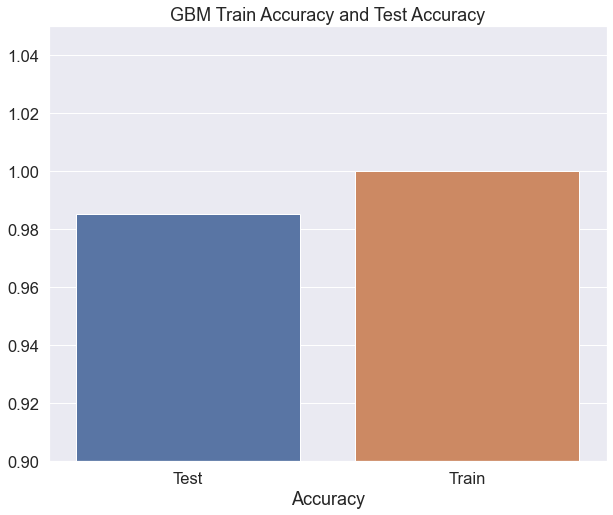

In [21]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
g=sns.barplot(data=accu)
g.set_ylim(0.9, 1.05)
g.set(xlabel='Accuracy', title='GBM Train Accuracy and Test Accuracy')

Text(0.5, 0, 'Relative Importance')

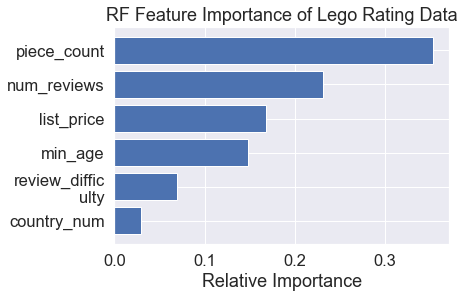

In [22]:
lego_features = lego_subset.drop('star_rating', axis = 1)
features = lego_features.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]
plt.figure(1)
plt.title('RF Feature Importance of Lego Rating Data')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance')

# Random Forest Optimized

In [23]:
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter= Counter(y_train)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

forest_y_predict = forest.predict(X_test)
print(forest_y_predict[0:5, ])

[False  True  True False  True]


In [24]:
forest_y_predict_prob = forest.predict_proba(X_test) 
print(forest_y_predict_prob[5:])

[[0.09 0.91]
 [0.98 0.02]
 [0.01 0.99]
 ...
 [0.02 0.98]
 [0.05 0.95]
 [0.99 0.01]]


0.9865573770491803
0.9861910241657077
0.9901790872328134


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


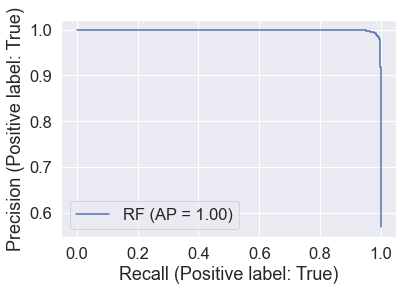

0.9881810319976938
0.9869860647241735
Log loss:  0.08001280076646028


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


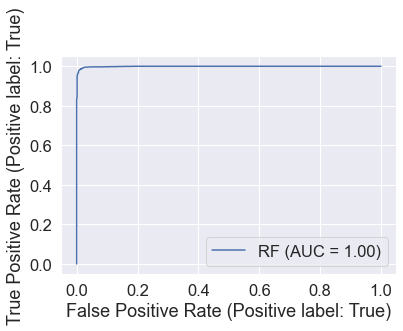

AUC:  0.9989921990689339


In [25]:
forest_accuracy = metrics.accuracy_score(y_test, forest_y_predict)
print(forest_accuracy)

forest_precision = metrics.precision_score(y_test, forest_y_predict)
print(forest_precision)

forest_recall = metrics.recall_score(y_test, forest_y_predict)
print(forest_recall)

rf_prec_recall = metrics.plot_precision_recall_curve(forest, X_test, y_test, name = "RF")
plt.show()

forest_f1 = metrics.f1_score(y_test, forest_y_predict)
print(forest_f1)

forest_fbeta = metrics.fbeta_score(y_test, forest_y_predict, beta = 0.5)
print(forest_fbeta)


forest_log_loss = metrics.log_loss(y_test, forest_y_predict_prob[:, 1], eps=1e-15)
print ("Log loss: ", forest_log_loss)

rf_roc = metrics.plot_roc_curve(forest, X_test, y_test, name = "RF")
plt.show()

forest_auc = metrics.roc_auc_score(y_test, forest_y_predict_prob[:, 1])
print("AUC: ", forest_auc)

In [26]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):
    from sklearn import metrics
    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]
    # Score values.
    metric_values = [None]*len(metric_keys)
    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
    perf_metrics = dict(zip(metric_keys, metric_values))
    return(perf_metrics)

{'RF': {'accuracy': 0.9865573770491803, 'precision': 0.9861910241657077, 'recall': 0.9901790872328134, 'f1': 0.9881810319976938, 'fbeta': 0.9869860647241735, 'log_loss': 0.08001280076646028, 'AUC': 0.9989921990689339}}
Overall accuracy:  0.9231045298655004


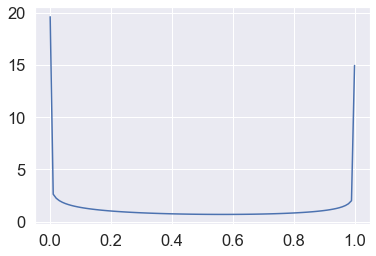

In [27]:
forest_scores = get_performance_scores(y_test, forest_y_predict, forest_y_predict_prob)
metrics_forest = {"RF": forest_scores}
print(metrics_forest)

print("Overall accuracy: ", np.exp(-forest_log_loss))

prob_increments = [x*0.01 for x in range(0, 101)]

losses = [metrics.log_loss(y_test, [y for x in range(len(y_test))]) for y in prob_increments]
plt.plot(prob_increments, losses)
plt.show()

In [28]:
forest.get_params

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                                  n_iter = 100, 
                                  cv = 3, 
                                  verbose=0, 
                                  random_state= 1, 
                                  n_jobs = -1)

In [30]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70}

In [31]:
optimized_forest = RandomForestClassifier(**rf_random.best_params_)
optimized_forest.fit(X_train, y_train)

optimized_forest_y_predict = optimized_forest.predict(X_test)
optimized_forest_y_predict_proba = optimized_forest.predict_proba(X_test)
optimized_forest_scores = get_performance_scores(y_test, 
                                                    optimized_forest_y_predict,
                                                    optimized_forest_y_predict_proba)
print(optimized_forest_scores)

C:\Users\625737\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'accuracy': 0.9865573770491803, 'precision': 0.983963344788087, 'recall': 0.9924898902368573, 'f1': 0.9882082254817371, 'fbeta': 0.9856569133677565, 'log_loss': 0.08033956889198147, 'AUC': 0.9990576776605002}


C:\Users\625737\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


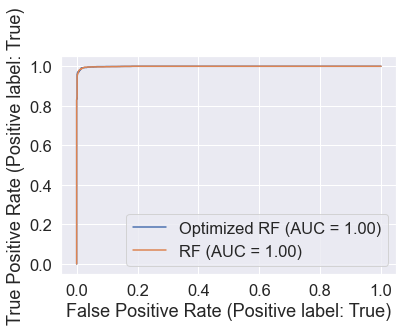

In [32]:
ax = plt.gca()
opt_rf_roc = metrics.plot_roc_curve(optimized_forest,
                       X_test,
                       y_test,
                       name = "Optimized RF",
                       ax = ax)
rf_roc.plot(ax = ax, name = "RF")
plt.show()

In [36]:
metrics= open('metrics_forest.sav', 'wb')
pickle.dump(metrics_forest, metrics)
metrics.close()

In [37]:
metrics_forest.update({"Optimized RF": optimized_forest_scores})
print(metrics_forest)

{'RF': {'accuracy': 0.9865573770491803, 'precision': 0.9861910241657077, 'recall': 0.9901790872328134, 'f1': 0.9881810319976938, 'fbeta': 0.9869860647241735, 'log_loss': 0.08001280076646028, 'AUC': 0.9989921990689339}, 'Optimized RF': {'accuracy': 0.9865573770491803, 'precision': 0.983963344788087, 'recall': 0.9924898902368573, 'f1': 0.9882082254817371, 'fbeta': 0.9856569133677565, 'log_loss': 0.08033956889198147, 'AUC': 0.9990576776605002}}


In [38]:
metrics_forest

{'RF': {'accuracy': 0.9865573770491803,
  'precision': 0.9861910241657077,
  'recall': 0.9901790872328134,
  'f1': 0.9881810319976938,
  'fbeta': 0.9869860647241735,
  'log_loss': 0.08001280076646028,
  'AUC': 0.9989921990689339},
 'Optimized RF': {'accuracy': 0.9865573770491803,
  'precision': 0.983963344788087,
  'recall': 0.9924898902368573,
  'f1': 0.9882082254817371,
  'fbeta': 0.9856569133677565,
  'log_loss': 0.08033956889198147,
  'AUC': 0.9990576776605002}}